In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv('exchange_rate.csv')

# Display the first few rows of the dataset
print(df.head())


               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


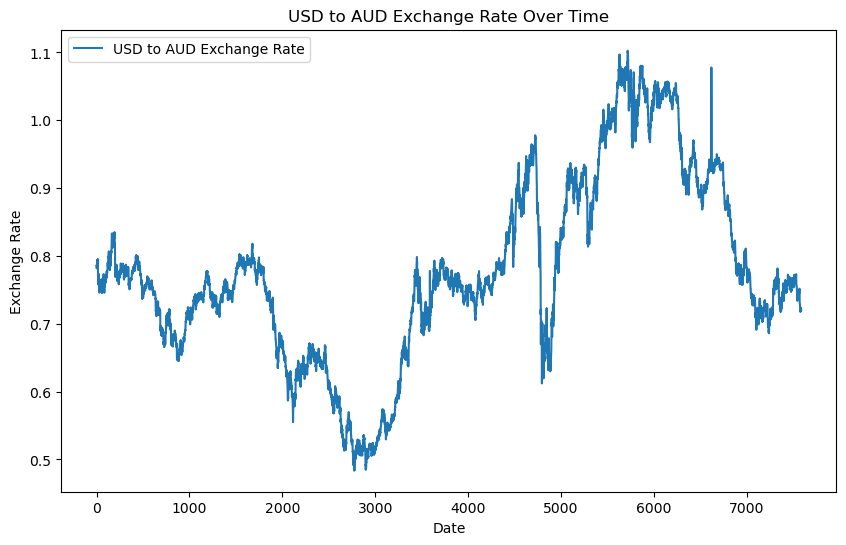

In [5]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [7]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values, if any
df.fillna(method='ffill', inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())


date       0
Ex_rate    0
dtype: int64
date       0
Ex_rate    0
dtype: int64


C:\Users\MY PC\AppData\Local\Temp\ipykernel_20680\2341844333.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


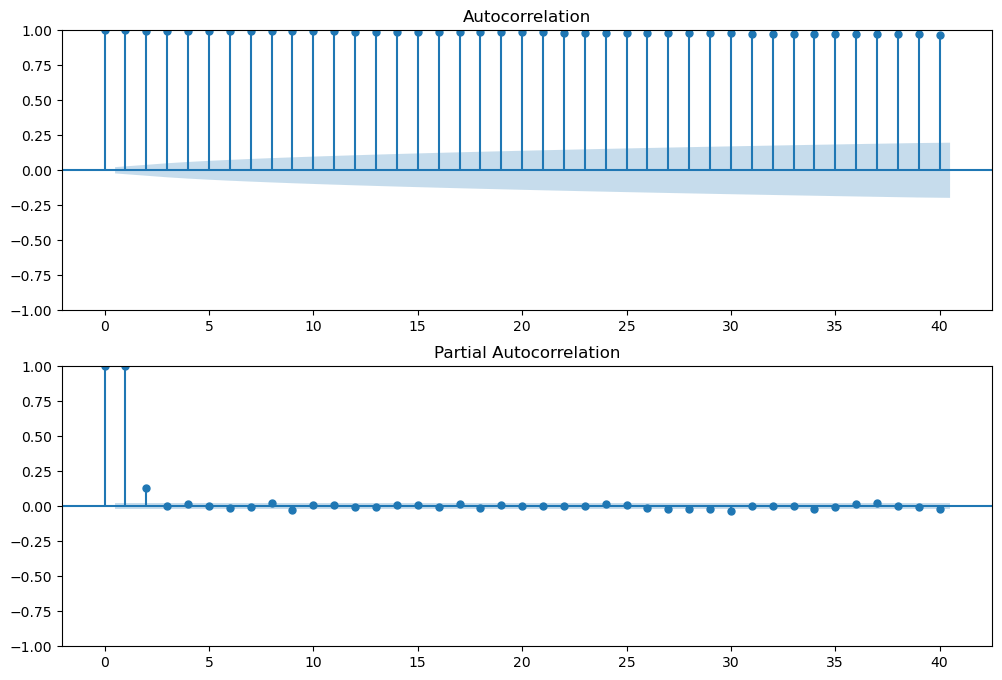

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Ex_rate'], lags=40, ax=ax[0])
plot_pacf(df['Ex_rate'], lags=40, ax=ax[1])
plt.show()


In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model (example parameters, to be chosen based on ACF and PACF plots)
p, d, q = 1, 1, 1
model_arima = ARIMA(df['Ex_rate'], order=(p, d, q))
model_fit_arima = model_arima.fit()

# Summary of the model
print(model_fit_arima.summary())


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 24 Jun 2024   AIC                         -56102.322
Time:                        19:40:01   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

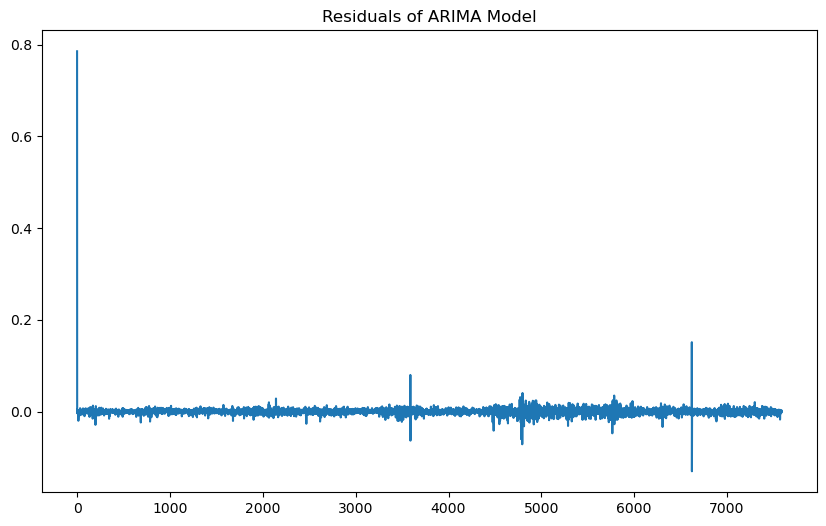

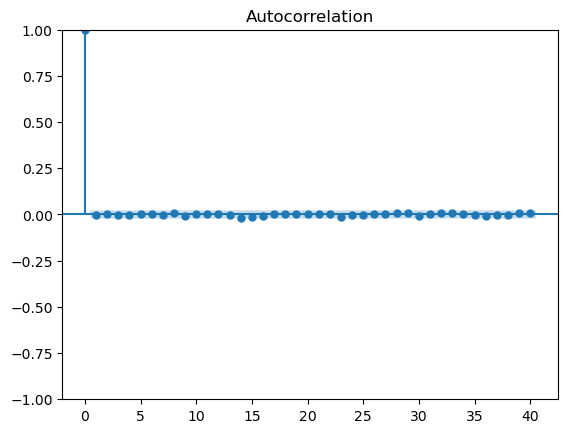

In [17]:
# Plot residuals
residuals = model_fit_arima.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

# Plot ACF of residuals
plot_acf(residuals, lags=40)
plt.show()


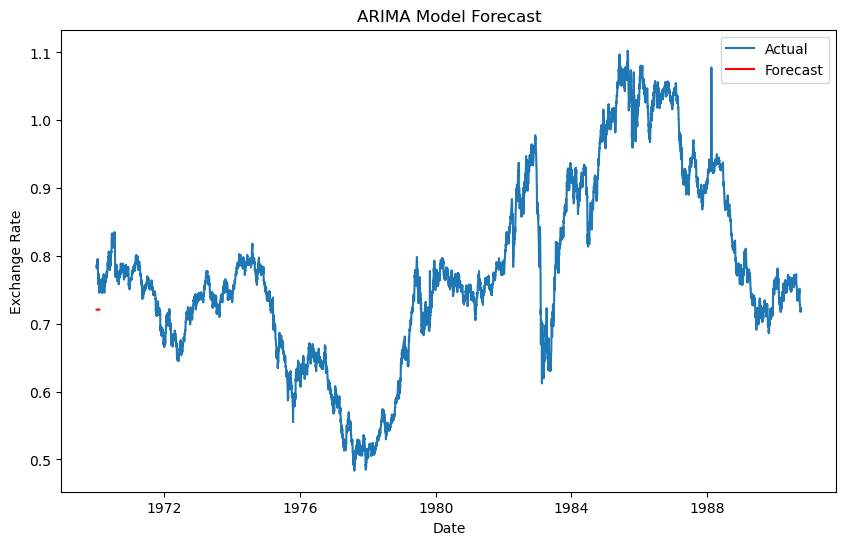

In [21]:
# Forecasting
forecast_steps = 30
forecast_arima = model_fit_arima.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='D'), forecast_arima, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define and fit the model (example with Holt-Winters)
model_exp_smoothing = ExponentialSmoothing(df['Ex_rate'], seasonal='add', seasonal_periods=12)
model_fit_exp_smoothing = model_exp_smoothing.fit()

# Summary of the model
print(model_fit_exp_smoothing.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.479
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Mon, 24 Jun 2024
Box-Cox:                          False   Time:                         19:41:27
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698373                alpha                 True
smoothing_seasonal       

In [27]:
# Example of optimization using grid search (simplified)
param_grid = {
    'trend': ['add', 'mul', None],
    'seasonal': ['add', 'mul', None],
    'seasonal_periods': [12, 24]
}

best_aic = float('inf')
best_params = None
best_model = None

for trend in param_grid['trend']:
    for seasonal in param_grid['seasonal']:
        for seasonal_periods in param_grid['seasonal_periods']:
            try:
                model = ExponentialSmoothing(df['USD_AUD'], trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
                fit = model.fit()
                if fit.aic < best_aic:
                    best_aic = fit.aic
                    best_params = (trend, seasonal, seasonal_periods)
                    best_model = fit
            except:
                continue

print(f'Best AIC: {best_aic}')
print(f'Best Parameters: {best_params}')


Best AIC: inf
Best Parameters: None


               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


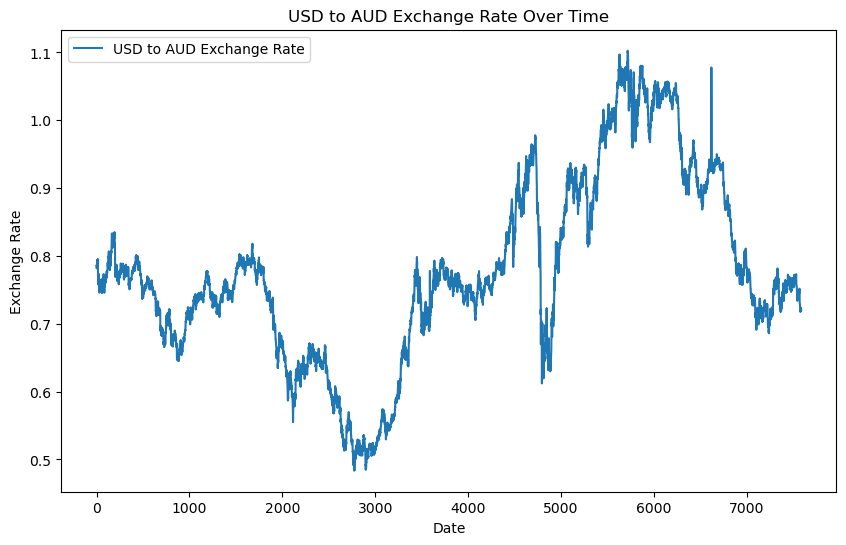

date       0
Ex_rate    0
dtype: int64
date       0
Ex_rate    0
dtype: int64
Trying model with trend=add, seasonal=add, seasonal_periods=12
Error fitting model with trend=add, seasonal=add, seasonal_periods=12: 'USD_AUD'
Trying model with trend=add, seasonal=add, seasonal_periods=24
Error fitting model with trend=add, seasonal=add, seasonal_periods=24: 'USD_AUD'
Trying model with trend=add, seasonal=mul, seasonal_periods=12
Error fitting model with trend=add, seasonal=mul, seasonal_periods=12: 'USD_AUD'
Trying model with trend=add, seasonal=mul, seasonal_periods=24
Error fitting model with trend=add, seasonal=mul, seasonal_periods=24: 'USD_AUD'
Trying model with trend=add, seasonal=None, seasonal_periods=12
Error fitting model with trend=add, seasonal=None, seasonal_periods=12: 'USD_AUD'
Trying model with trend=add, seasonal=None, seasonal_periods=24
Error fitting model with trend=add, seasonal=None, seasonal_periods=24: 'USD_AUD'
Trying model with trend=mul, seasonal=add, seasonal_pe

C:\Users\MY PC\AppData\Local\Temp\ipykernel_20680\2797111374.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset

df = pd.read_csv('exchange_rate.csv')

# Check the first few rows of the dataset
print(df.head())

# Initial Exploration: Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Check for missing values
print(df.isnull().sum())

# Fill missing values, if any
df.fillna(method='ffill', inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

# Define parameter grid for Exponential Smoothing
param_grid = {
    'trend': ['add', 'mul', None],
    'seasonal': ['add', 'mul', None],
    'seasonal_periods': [12, 24]
}

best_aic = float('inf')
best_params = None
best_model = None

# Grid Search for best parameters
for trend in param_grid['trend']:
    for seasonal in param_grid['seasonal']:
        for seasonal_periods in param_grid['seasonal_periods']:
            try:
                print(f'Trying model with trend={trend}, seasonal={seasonal}, seasonal_periods={seasonal_periods}')
                model = ExponentialSmoothing(df['USD_AUD'], trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
                fit = model.fit()
                print(f'Model AIC: {fit.aic}')
                if fit.aic < best_aic:
                    best_aic = fit.aic
                    best_params = (trend, seasonal, seasonal_periods)
                    best_model = fit
            except Exception as e:
                print(f'Error fitting model with trend={trend}, seasonal={seasonal}, seasonal_periods={seasonal_periods}: {e}')
                continue

if best_model is not None:
    print(f'Best AIC: {best_aic}')
    print(f'Best Parameters: {best_params}')
    
    # Forecasting
    forecast_steps = 30
    forecast_exp_smoothing = best_model.forecast(steps=forecast_steps)
    
    # Plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Ex_rate'], label='Actual')
    plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='D'), forecast_exp_smoothing, label='Forecast', color='red')
    plt.title('Exponential Smoothing Model Forecast')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()
else:
    print('No suitable model found in grid search.')


               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


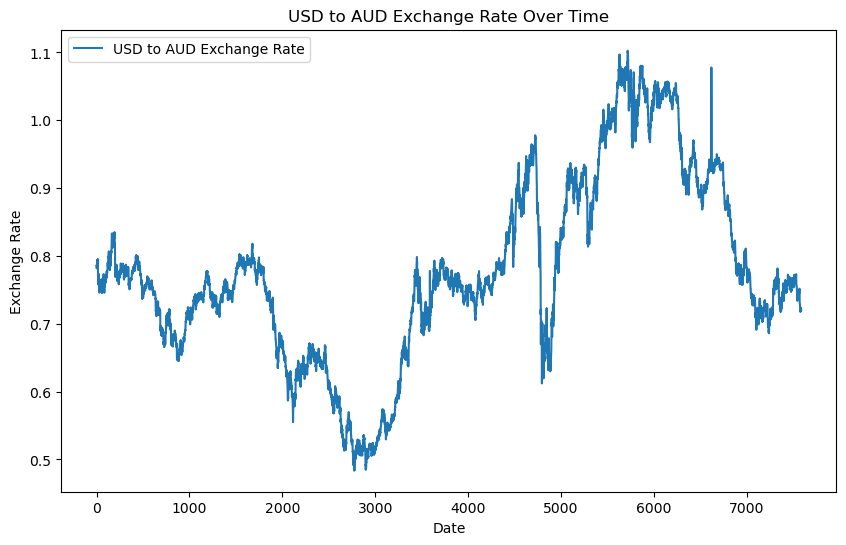

date       0
Ex_rate    0
dtype: int64
date       0
Ex_rate    0
dtype: int64
Trying model with trend=add, seasonal=add, seasonal_periods=12


C:\Users\MY PC\AppData\Local\Temp\ipykernel_20680\1930663156.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Model AIC: -77624.61073082773
Trying model with trend=add, seasonal=add, seasonal_periods=24
Model AIC: -77610.95910209444
Trying model with trend=add, seasonal=mul, seasonal_periods=12
Model AIC: -77624.54531332864
Trying model with trend=add, seasonal=mul, seasonal_periods=24
Model AIC: -77613.84250601588
Trying model with trend=add, seasonal=None, seasonal_periods=12
Model AIC: -77641.00932749578
Trying model with trend=add, seasonal=None, seasonal_periods=24
Model AIC: -77641.00932749578
Trying model with trend=mul, seasonal=add, seasonal_periods=12
Model AIC: -77624.75600964711
Trying model with trend=mul, seasonal=add, seasonal_periods=24
Model AIC: -77611.11593060225
Trying model with trend=mul, seasonal=mul, seasonal_periods=12


C:\Users\MY PC\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Model AIC: -77624.7077188159
Trying model with trend=mul, seasonal=mul, seasonal_periods=24


C:\Users\MY PC\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Model AIC: -77613.99879848598
Trying model with trend=mul, seasonal=None, seasonal_periods=12
Model AIC: -77641.16854393118
Trying model with trend=mul, seasonal=None, seasonal_periods=24
Model AIC: -77641.16854393118
Trying model with trend=None, seasonal=add, seasonal_periods=12
Model AIC: -77628.55993816568
Trying model with trend=None, seasonal=add, seasonal_periods=24
Model AIC: -77613.77786339735
Trying model with trend=None, seasonal=mul, seasonal_periods=12
Model AIC: -77628.5276952004
Trying model with trend=None, seasonal=mul, seasonal_periods=24
Model AIC: -77617.82364162905
Trying model with trend=None, seasonal=None, seasonal_periods=12
Model AIC: -77644.98075015451
Trying model with trend=None, seasonal=None, seasonal_periods=24
Model AIC: -77644.98075015451
Best AIC: -77644.98075015451
Best Parameters: (None, None, 12)


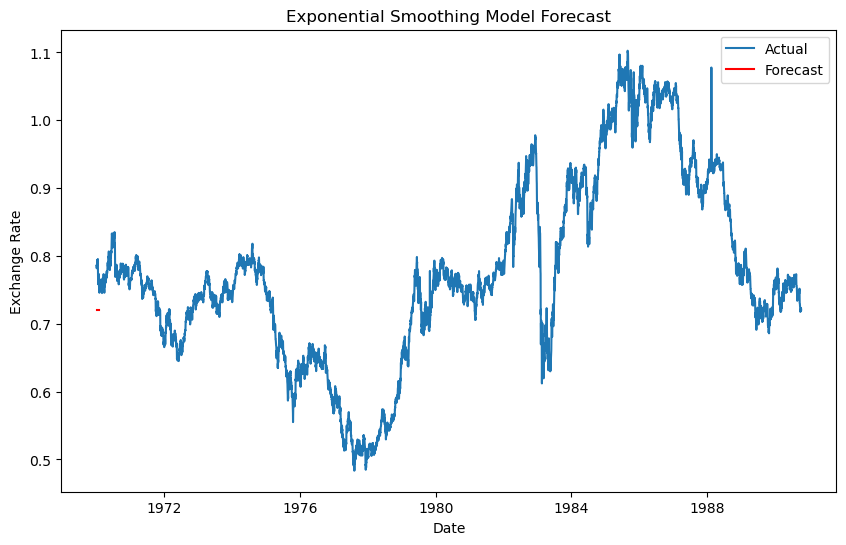

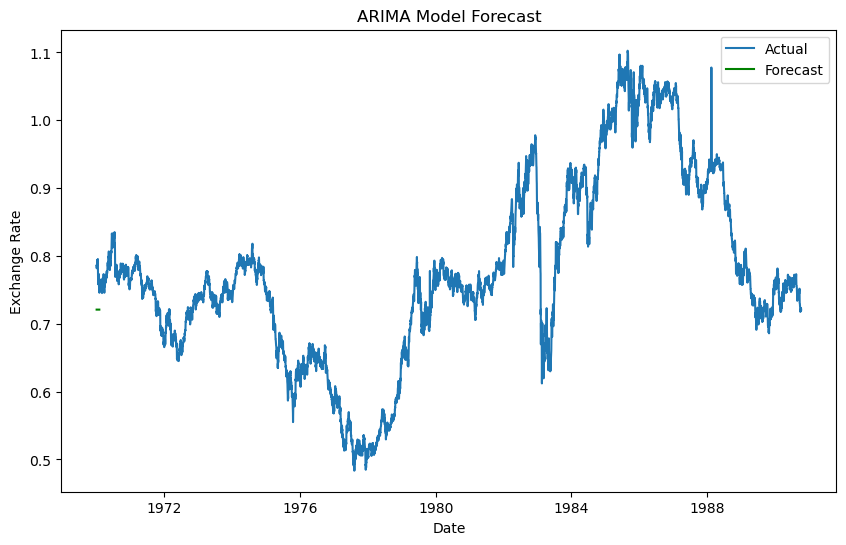

ARIMA MAE: 0.012724006489318252, RMSE: 0.016982710912774826, MAPE: nan%
Exponential Smoothing MAE: 0.012707429455453357, RMSE: 0.016957814302469364, MAPE: nan%


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset

df = pd.read_csv('exchange_rate.csv')

# Check the first few rows of the dataset
print(df.head())

# Initial Exploration: Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Check for missing values
print(df.isnull().sum())

# Fill missing values, if any
df.fillna(method='ffill', inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

# Define parameter grid for Exponential Smoothing
param_grid = {
    'trend': ['add', 'mul', None],
    'seasonal': ['add', 'mul', None],
    'seasonal_periods': [12, 24]
}

best_aic = float('inf')
best_params = None
best_model = None

# Grid Search for best parameters
for trend in param_grid['trend']:
    for seasonal in param_grid['seasonal']:
        for seasonal_periods in param_grid['seasonal_periods']:
            try:
                print(f'Trying model with trend={trend}, seasonal={seasonal}, seasonal_periods={seasonal_periods}')
                model = ExponentialSmoothing(df['Ex_rate'], trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
                fit = model.fit()
                print(f'Model AIC: {fit.aic}')
                if fit.aic < best_aic:
                    best_aic = fit.aic
                    best_params = (trend, seasonal, seasonal_periods)
                    best_model = fit
            except Exception as e:
                print(f'Error fitting model with trend={trend}, seasonal={seasonal}, seasonal_periods={seasonal_periods}: {e}')
                continue

if best_model is not None:
    print(f'Best AIC: {best_aic}')
    print(f'Best Parameters: {best_params}')
    
    # Forecasting
    forecast_steps = 30
    forecast_exp_smoothing = best_model.forecast(steps=forecast_steps)
    
    # Plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Ex_rate'], label='Actual')
    plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='D'), forecast_exp_smoothing, label='Forecast', color='red')
    plt.title('Exponential Smoothing Model Forecast')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()
else:
    print('No suitable model found in grid search.')

# ARIMA Model Fitting and Forecasting
p, d, q = 1, 1, 1  # Example parameters
model_arima = ARIMA(df['Ex_rate'], order=(p, d, q))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=forecast_steps)

# Plot the ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='D'), forecast_arima, label='Forecast', color='green')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Calculate error metrics for ARIMA
mae_arima = mean_absolute_error(df['Ex_rate'][-forecast_steps:], forecast_arima)
rmse_arima = mean_squared_error(df['Ex_rate'][-forecast_steps:], forecast_arima, squared=False)
mape_arima = (abs(df['Ex_rate'][-forecast_steps:] - forecast_arima) / df['Ex_rate'][-forecast_steps:]).mean() * 100

# Calculate error metrics for Exponential Smoothing
if 'forecast_exp_smoothing' in locals():
    mae_exp_smoothing = mean_absolute_error(df['Ex_rate'][-forecast_steps:], forecast_exp_smoothing)
    rmse_exp_smoothing = mean_squared_error(df['Ex_rate'][-forecast_steps:], forecast_exp_smoothing, squared=False)
    mape_exp_smoothing = (abs(df['Ex_rate'][-forecast_steps:] - forecast_exp_smoothing) / df['Ex_rate'][-forecast_steps:]).mean() * 100
    
    print(f'ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%')
    print(f'Exponential Smoothing MAE: {mae_exp_smoothing}, RMSE: {rmse_exp_smoothing}, MAPE: {mape_exp_smoothing}%')
else:
    print(f'ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%')
    print('Exponential Smoothing model was not fitted correctly; no error metrics available.')


In [ ]:
Key Updates:
Exponential Smoothing Grid Search: Added print statements to log the parameters and AIC values during the grid search.
ARIMA Model: Included ARIMA model fitting and forecasting steps.
Error Metrics Calculation: Checks if forecast_exp_smoothing is defined before calculating error metrics for Exponential Smoothing.
Execution:
Ensure the dataset path is correct.
Run the script to fit both models, forecast future values, and calculate error metrics.
The script includes plotting and error metric calculation for both models, with print statements to aid debugging.
This should help identify and resolve any issues with the model fitting process. If further issues arise, please provide specific error messages or problematic sections.








